In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=5ba1319608643e1487a6edbd8839255dbbadb0a36c506f06e5e2ba1d781c44c0
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

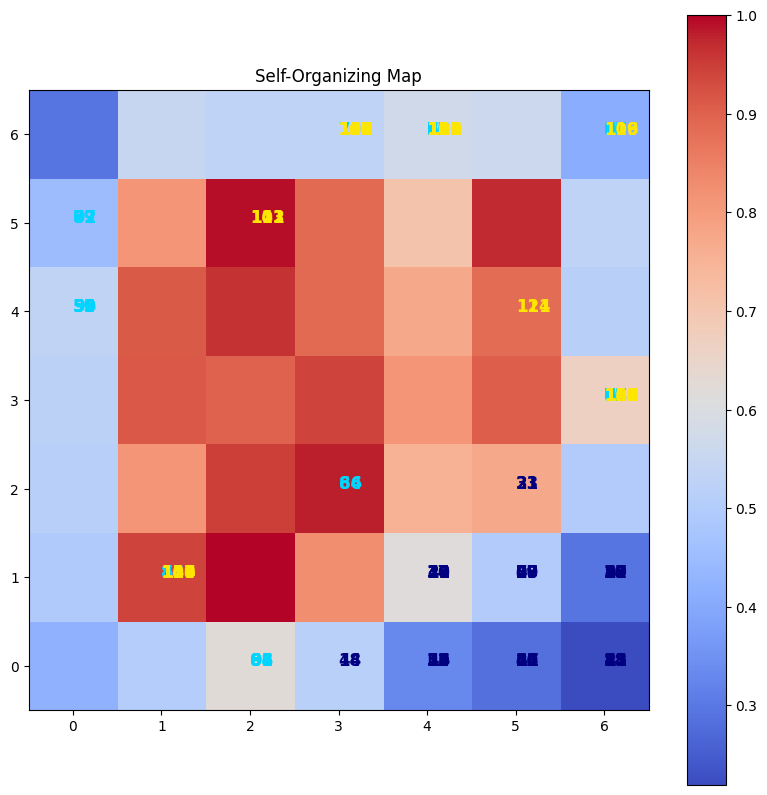

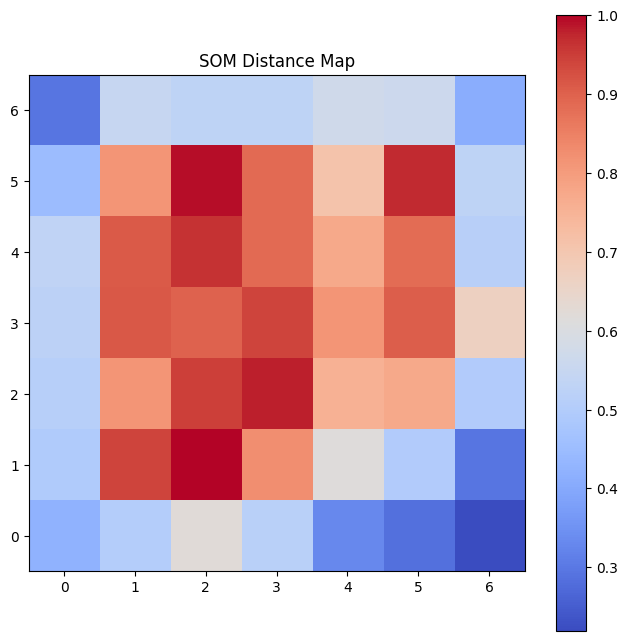

Best Matching Units (BMUs) for each data point:
 [[5 1]
 [6 0]
 [6 1]
 [6 0]
 [4 1]
 [4 0]
 [5 0]
 [5 1]
 [6 0]
 [6 1]
 [4 1]
 [5 0]
 [6 0]
 [6 0]
 [4 0]
 [4 0]
 [4 0]
 [5 0]
 [3 0]
 [4 0]
 [5 1]
 [4 1]
 [5 0]
 [5 2]
 [5 0]
 [6 0]
 [5 0]
 [5 1]
 [5 1]
 [6 1]
 [6 1]
 [5 2]
 [4 0]
 [4 0]
 [6 1]
 [6 1]
 [4 1]
 [4 1]
 [6 0]
 [5 1]
 [5 0]
 [6 0]
 [6 1]
 [5 0]
 [3 0]
 [6 0]
 [4 0]
 [6 1]
 [4 1]
 [5 1]
 [4 6]
 [1 1]
 [4 6]
 [6 6]
 [6 3]
 [0 4]
 [1 1]
 [6 6]
 [4 6]
 [0 4]
 [6 6]
 [2 0]
 [6 6]
 [6 3]
 [2 0]
 [4 6]
 [3 2]
 [0 5]
 [6 6]
 [6 6]
 [3 6]
 [6 3]
 [6 3]
 [6 3]
 [6 3]
 [4 6]
 [4 6]
 [4 6]
 [6 3]
 [0 5]
 [6 6]
 [6 6]
 [0 5]
 [6 3]
 [3 2]
 [1 1]
 [4 6]
 [6 6]
 [2 0]
 [6 6]
 [0 4]
 [6 3]
 [0 5]
 [6 6]
 [0 4]
 [2 0]
 [2 0]
 [6 3]
 [6 6]
 [0 4]
 [3 6]
 [2 5]
 [4 6]
 [3 6]
 [3 6]
 [4 6]
 [6 6]
 [4 6]
 [6 3]
 [1 1]
 [1 1]
 [6 3]
 [4 6]
 [2 5]
 [5 4]
 [3 6]
 [4 6]
 [1 1]
 [4 6]
 [6 6]
 [4 6]
 [5 4]
 [4 6]
 [6 3]
 [1 1]
 [4 6]
 [6 3]
 [3 6]
 [6 3]
 [4 6]
 [4 6]
 [4 6]
 [3 6]
 [6 3]
 [6 3]
 [4 6]

In [4]:
som_size = 7
som = MiniSom(som_size, som_size, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.train(X_scaled, 100)

plt.figure(figsize=(10, 10))
plt.title('Self-Organizing Map')
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0], w[1], str(i), color=plt.cm.jet(y[i] / 3), fontweight='bold', fontsize=12)

plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()

bmus = np.array([som.winner(x) for x in X_scaled])
print("Best Matching Units (BMUs) for each data point:\n", bmus)